In [12]:
import pandas as pd
import numpy as np
import sklearn as skl
import os
from sklearn.model_selection import train_test_split

In [15]:
np.random.seed(200)

In [382]:
data0 = pd.read_csv(r"C:\\Users\\Promy\\Titanic\\train.csv")
sex_mapping = {"male": 0, "female": 1}
data0["Sex"] = data0["Sex"].map(sex_mapping)
#data0.dropna(inplace=True)
data = data0.drop(["PassengerId","Name","Ticket","Embarked","Cabin","Fare"],axis=1)

In [383]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,0,22.0,1,0
1,1,1,1,38.0,1,0
2,1,3,1,26.0,0,0
3,1,1,1,35.0,1,0
4,0,3,0,35.0,0,0


In [384]:
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000


In [385]:
for i in data.columns:
    print(data[i].isnull().values.any())

False
False
False
True
False
False


In [386]:
data["Age"] = data["Age"].fillna(np.round(data["Age"].mean()))

In [387]:
for i in data.columns:
    print(data[i].isnull().values.any())

False
False
False
False
False
False


In [376]:
import seaborn

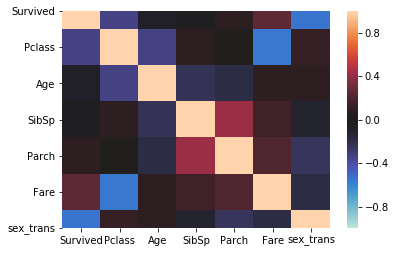

In [178]:
seaborn.heatmap(data.corr(),vmin=-1, vmax=1,center=0)

In [269]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import regularizers

In [388]:
X=data.iloc[:,1:len(data.columns)]
Y=data["Survived"]

In [389]:
scalerx = skl.preprocessing.MinMaxScaler()
#scalery = skl.preprocessing.MinMaxScaler()

X2 = scalerx.fit_transform(X)
#Y2=scalery.fit_transform(Y)
Y = keras.utils.to_categorical(Y, num_classes=2, dtype='float32')


In [390]:
x_train, x_test, y_train, y_test = train_test_split(X2,Y,test_size=0.30, random_state=200)

In [391]:
x_train.shape

(623, 5)

In [392]:
x_train[0:5]

array([[1.        , 0.        , 0.37170143, 0.125     , 0.        ],
       [0.        , 0.        , 0.54762503, 0.25      , 0.        ],
       [1.        , 0.        , 0.19577783, 0.125     , 0.5       ],
       [1.        , 0.        , 0.37170143, 0.375     , 0.16666667],
       [0.5       , 0.        , 0.00728826, 0.25      , 0.16666667]])

In [393]:
y_train.shape

(623, 2)

In [394]:
model = Sequential()
model.add(Dense(32, input_dim=x_train.shape[1], activation='relu',kernel_regularizer=regularizers.l2(0.001)))
#model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

In [395]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [396]:
model.fit(x_train, y_train,validation_data=(x_test,y_test),
          epochs=10)

Train on 623 samples, validate on 268 samples
Epoch 1/10
623/623 [==============================] - 3s 5ms/step - loss: 0.6769 - acc: 0.7737 - val_loss: 0.6611 - val_acc: 0.7761
Epoch 2/10
623/623 [==============================] - 0s 292us/step - loss: 0.6443 - acc: 0.7705 - val_loss: 0.6300 - val_acc: 0.7799
Epoch 3/10
623/623 [==============================] - 0s 252us/step - loss: 0.6089 - acc: 0.7801 - val_loss: 0.5959 - val_acc: 0.7799
Epoch 4/10
623/623 [==============================] - 0s 260us/step - loss: 0.5719 - acc: 0.7785 - val_loss: 0.5593 - val_acc: 0.7687
Epoch 5/10
623/623 [==============================] - 0s 634us/step - loss: 0.5337 - acc: 0.8010 - val_loss: 0.5294 - val_acc: 0.7910
Epoch 6/10
623/623 [==============================] - 0s 247us/step - loss: 0.5033 - acc: 0.7978 - val_loss: 0.5090 - val_acc: 0.7910
Epoch 7/10
623/623 [==============================] - 0s 265us/step - loss: 0.4823 - acc: 0.7994 - val_loss: 0.4961 - val_acc: 0.7836
Epoch 8/10
623/623

In [358]:
score = model.evaluate(x_test, y_test)

268/268 [==============================] - 0s 388us/step


In [359]:
score

[0.48346208191629664, 0.7985074626865671]

In [360]:
model.history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

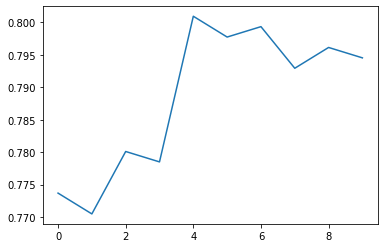

In [397]:
seaborn.lineplot(x=[i for i in range(len(model.history.history["acc"]))],y=model.history.history["acc"])

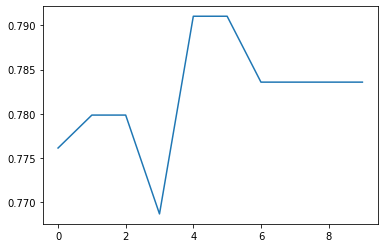

In [398]:
seaborn.lineplot(x=[i for i in range(len(model.history.history["val_acc"]))],y=model.history.history["val_acc"])

In [365]:


# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_test)
acc_gbk = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_gbk)



78.36


In [399]:
data0_t = pd.read_csv(r"C:\\Users\\Promy\\Titanic\\test.csv")
sex_mapping = {"male": 0, "female": 1}
data0_t["Sex"] = data0_t["Sex"].map(sex_mapping)
#data0.dropna(inplace=True)
data_t = data0_t.drop(["PassengerId","Name","Ticket","Embarked","Cabin","Fare"],axis=1)

In [400]:
data_t.describe(include="all")

,Pclass,Sex,Age,SibSp,Parch
count,418.000000,418.000000,332.000000,418.000000,418.000000
mean,2.265550,0.363636,30.272590,0.447368,0.392344
std,0.841838,0.481622,14.181209,0.896760,0.981429
min,1.000000,0.000000,0.170000,0.000000,0.000000
25%,1.000000,0.000000,21.000000,0.000000,0.000000
50%,3.000000,0.000000,27.000000,0.000000,0.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000
max,3.000000,1.000000,76.000000,8.000000,9.000000


In [401]:
for i in data_t.columns:
    print(data_t[i].isnull().values.any())

False
False
True
False
False


In [402]:
data_t["Age"] = data_t["Age"].fillna(np.round(data_t["Age"].mean()))

In [403]:
for i in data_t.columns:
    print(data_t[i].isnull().values.any())

False
False
False
False
False


In [404]:
X_p = scalerx.fit_transform(data_t)

In [405]:
Y_p = model.predict(X_p)

In [407]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [419]:
Y_pred = []
for i in Y_p:
    if i[0]>0.5:
        Y_pred.append(0)
    else:
        Y_pred.append(1)

In [422]:
#set ids as PassengerId and predict survival 
ids = data0_t['PassengerId']
predictions = Y_pred

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)